In [1]:
import numpy as np 
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns   

In [2]:
CLEAN_DATA_PATH = Path("../data/cleaned/cleaned.csv").resolve()

In [3]:
df=pd.read_csv(CLEAN_DATA_PATH)
df.shape

(13355, 18)

In [4]:
df.head()

,Age,Gender,Medical Condition,Glucose,Blood Pressure,BMI,Oxygen Saturation,LengthOfStay,Cholesterol,Triglycerides,HbA1c,Smoking,Alcohol,Physical Activity,Diet Score,Family History,Stress Level,Sleep Hours
0,46.0,Male,Diabetes,137.04,135.27,28.90,96.04,6,231.88,210.56,7.61,0,0,-0.20,3.54,0,5.07,6.05
1,22.0,Male,Healthy,71.58,113.27,26.29,97.54,2,165.57,129.41,4.91,0,0,8.12,5.90,0,5.87,7.72
2,66.0,Female,Hypertension,95.15,178.17,31.12,94.90,4,259.53,115.85,5.98,0,1,3.56,3.40,0,6.38,6.64
3,50.0,Male,Hypertension,107.00,171.80,25.33,95.21,5,233.10,203.67,5.48,1,0,5.01,4.65,0,7.25,6.35
4,13.0,Female,Asthma,90.60,126.88,29.24,97.96,6,193.44,163.65,6.18,1,0,5.27,5.63,0,7.09,5.41


In [9]:
def kde_plot (df, column,figsize=(10, 6)):
    plt.figure(figsize=figsize)
    sns.kdeplot(data=df, x=column, fill=True)
    plt.title(f"{column} Distribution")
    plt.xlabel(column)
    plt.axvline(df[column].mean(), color='red', linestyle='--', label=f'Mean {column}')
    plt.axvline(df[column].median(), color='blue', linestyle='-', label=f'Median {column}')
    plt.legend()
    plt.ylabel("Density")
    plt.show();



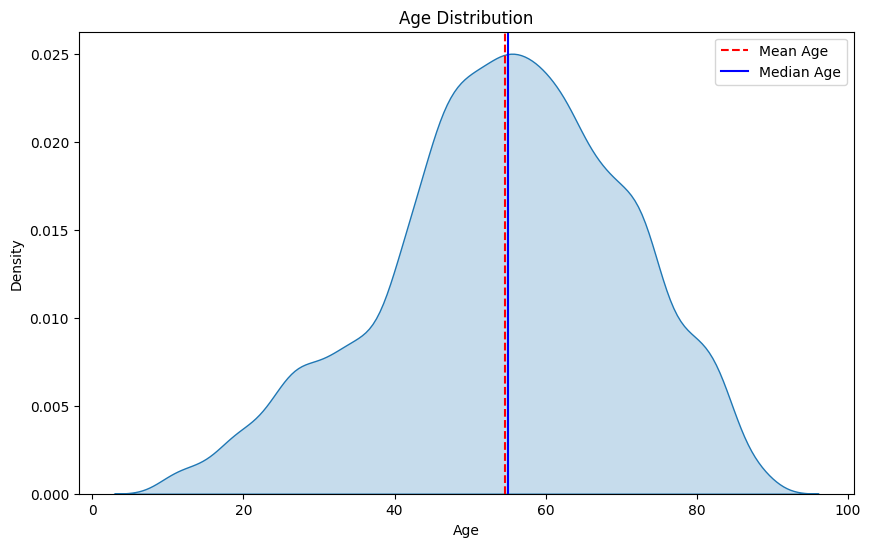

In [11]:
kde_plot(df, 'Age')

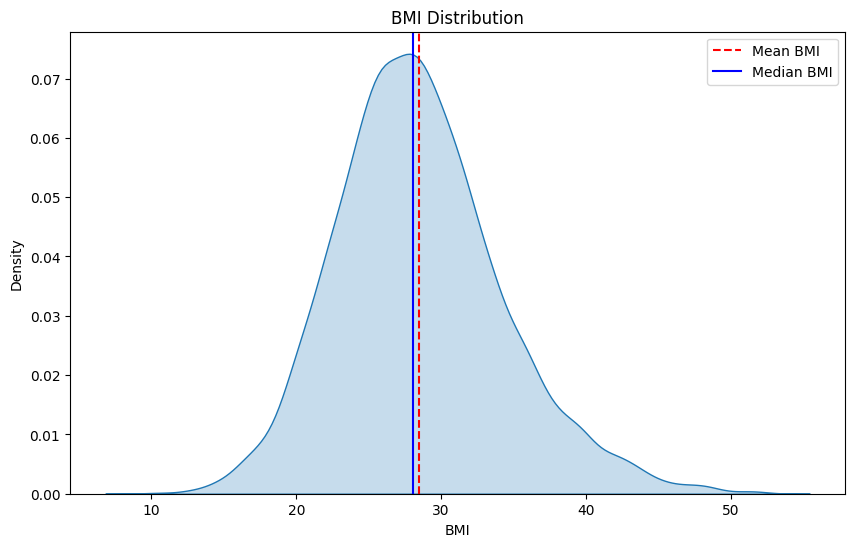

In [12]:
kde_plot(df, 'BMI')

In [13]:
df.columns

Index(['Age', 'Gender', 'Medical Condition', 'Glucose', 'Blood Pressure',
       'BMI', 'Oxygen Saturation', 'LengthOfStay', 'Cholesterol',
       'Triglycerides', 'HbA1c', 'Smoking', 'Alcohol', 'Physical Activity',
       'Diet Score', 'Family History', 'Stress Level', 'Sleep Hours'],
      dtype='object')

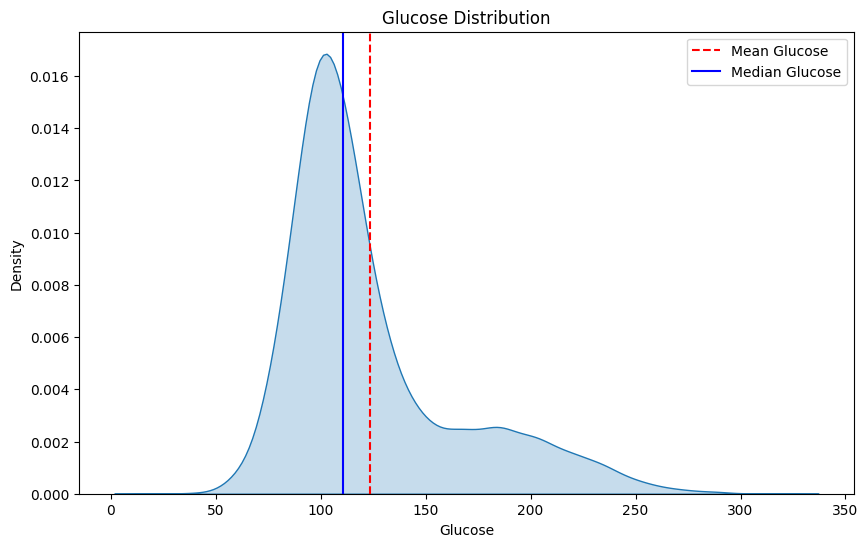

In [14]:
kde_plot(df, 'Glucose')

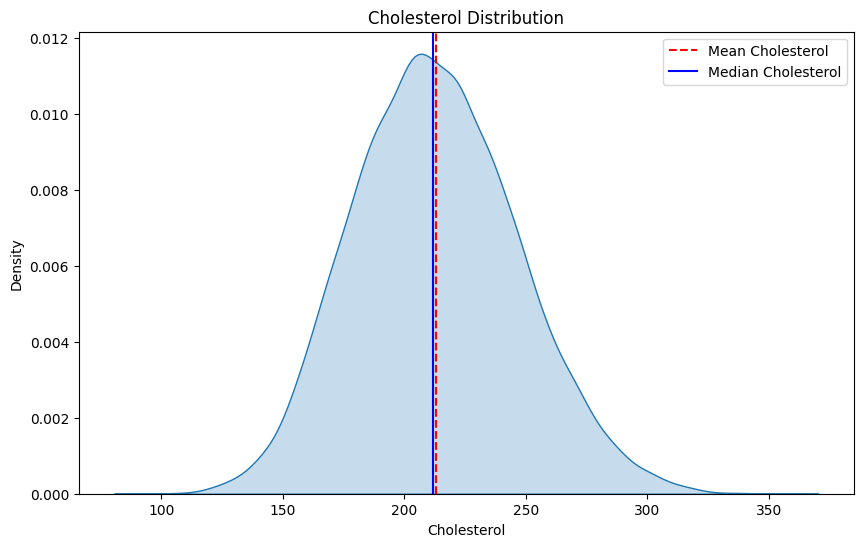

In [15]:
kde_plot(df, 'Cholesterol')

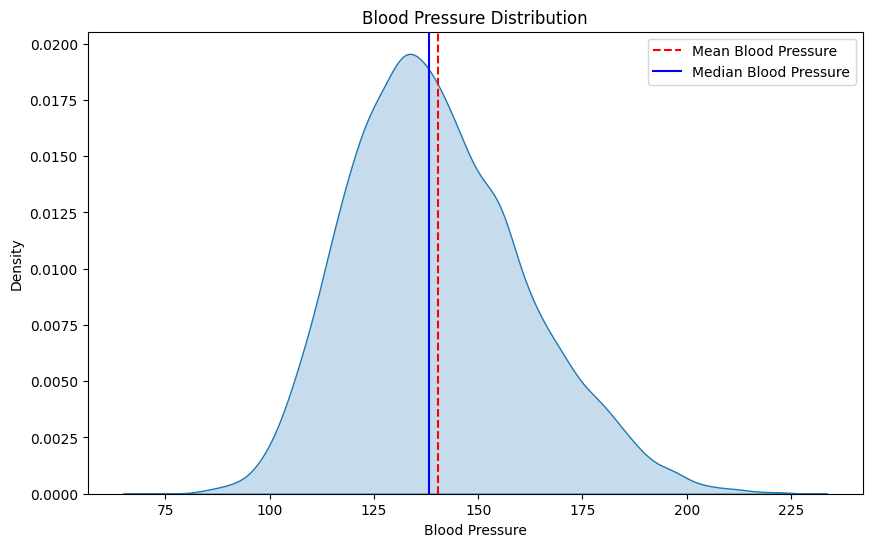

In [16]:
kde_plot(df, 'Blood Pressure')

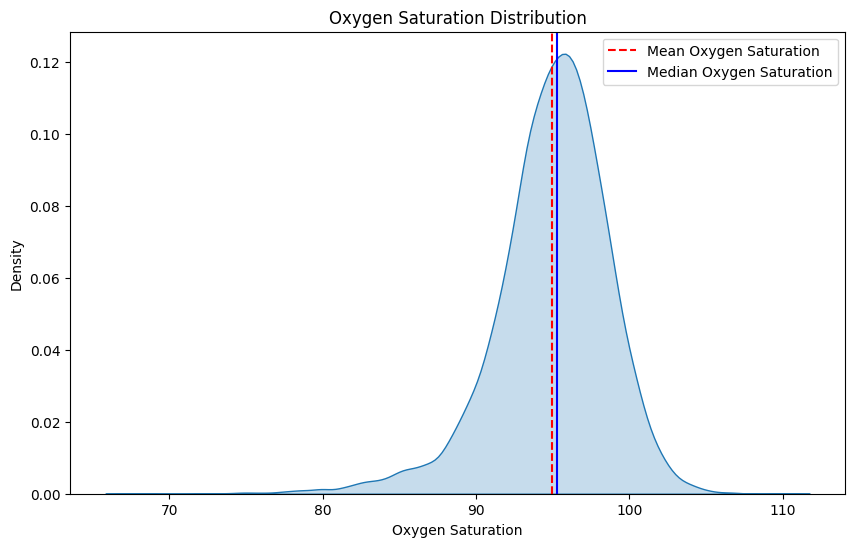

In [17]:
kde_plot(df, 'Oxygen Saturation')


In [18]:
df.head()

,Age,Gender,Medical Condition,Glucose,Blood Pressure,BMI,Oxygen Saturation,LengthOfStay,Cholesterol,Triglycerides,HbA1c,Smoking,Alcohol,Physical Activity,Diet Score,Family History,Stress Level,Sleep Hours
0,46.0,Male,Diabetes,137.04,135.27,28.90,96.04,6,231.88,210.56,7.61,0,0,-0.20,3.54,0,5.07,6.05
1,22.0,Male,Healthy,71.58,113.27,26.29,97.54,2,165.57,129.41,4.91,0,0,8.12,5.90,0,5.87,7.72
2,66.0,Female,Hypertension,95.15,178.17,31.12,94.90,4,259.53,115.85,5.98,0,1,3.56,3.40,0,6.38,6.64
3,50.0,Male,Hypertension,107.00,171.80,25.33,95.21,5,233.10,203.67,5.48,1,0,5.01,4.65,0,7.25,6.35
4,13.0,Female,Asthma,90.60,126.88,29.24,97.96,6,193.44,163.65,6.18,1,0,5.27,5.63,0,7.09,5.41


In [22]:
LengthOfStay_Value_Count=df.LengthOfStay.value_counts().reset_index()
LengthOfStay_Value_Count

,LengthOfStay,count
0,2,2474
1,3,2260
2,5,2250
3,4,2221
4,6,1550
5,1,817
6,7,651
7,8,626
8,15,53
9,13,52


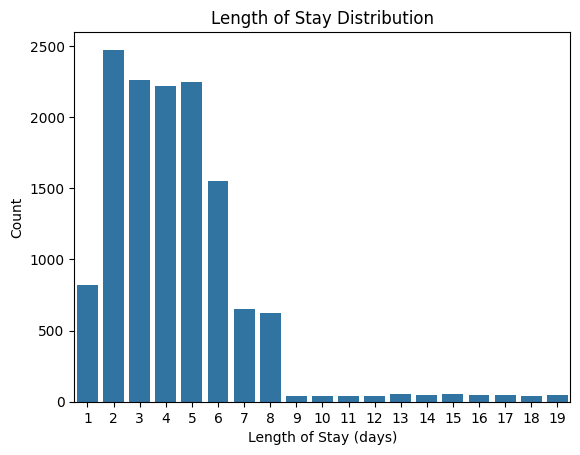

In [23]:
sns.barplot(data=LengthOfStay_Value_Count, x='LengthOfStay', y='count')
plt.title('Length of Stay Distribution')
plt.xlabel('Length of Stay (days)') 
plt.ylabel('Count')
plt.show();

In [25]:
MedicalCondition_Value_Count=df["Medical Condition"].value_counts().reset_index()
MedicalCondition_Value_Count

,Medical Condition,count
0,Hypertension,3748
1,Diabetes,3396
2,Obesity,2017
3,Healthy,1602
4,Asthma,1061
5,Arthritis,921
6,Cancer,610


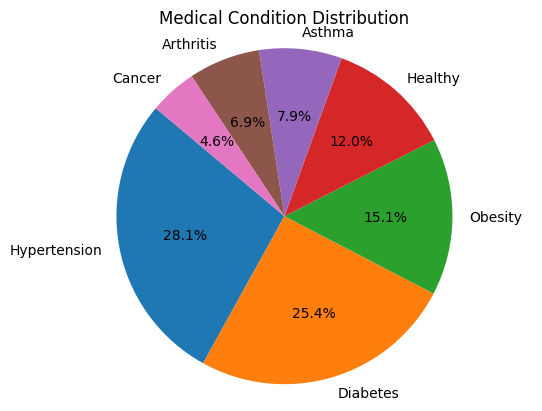

In [28]:
plt.pie (x=MedicalCondition_Value_Count['count'], labels=MedicalCondition_Value_Count['Medical Condition'], autopct='%1.1f%%', startangle=140)
plt.title('Medical Condition Distribution')
plt.axis('equal')  
plt.show();

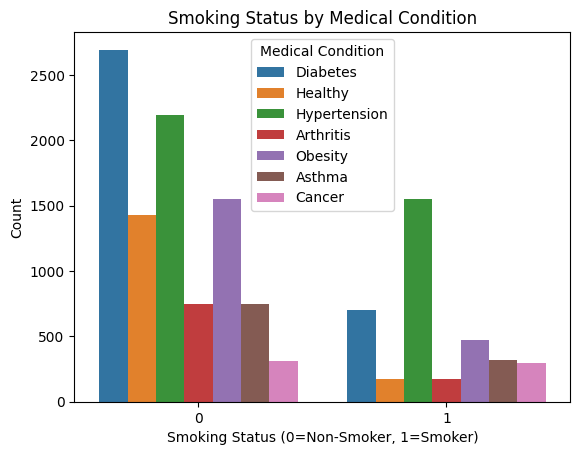

In [37]:
sns.countplot(data=df, x='Smoking', hue='Medical Condition')
plt.title('Smoking Status by Medical Condition')    
plt.xlabel('Smoking Status (0=Non-Smoker, 1=Smoker)')
plt.ylabel('Count')
plt.legend(title='Medical Condition')
plt.show();

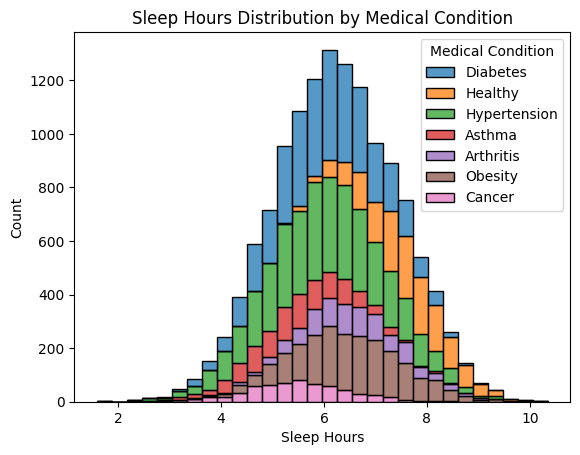

In [39]:
sns.histplot(data=df, x='Sleep Hours', hue='Medical Condition', multiple='stack', bins=30)
plt.title('Sleep Hours Distribution by Medical Condition')
plt.xlabel('Sleep Hours')
plt.ylabel('Count')
plt.show();